<a href="https://colab.research.google.com/github/nicolerdz/Regresion-no-lineal-y-logistica/blob/main/2022_8_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar archivo csv 
df=pd.read_csv('Datos_limpios2022_desv.csv')
df.head(5)

,Unnamed: 0,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP.1,TIPO,STATUS,POLIZA
0,0,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22
1,1,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22
2,2,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,NaN
3,3,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN
4,4,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN


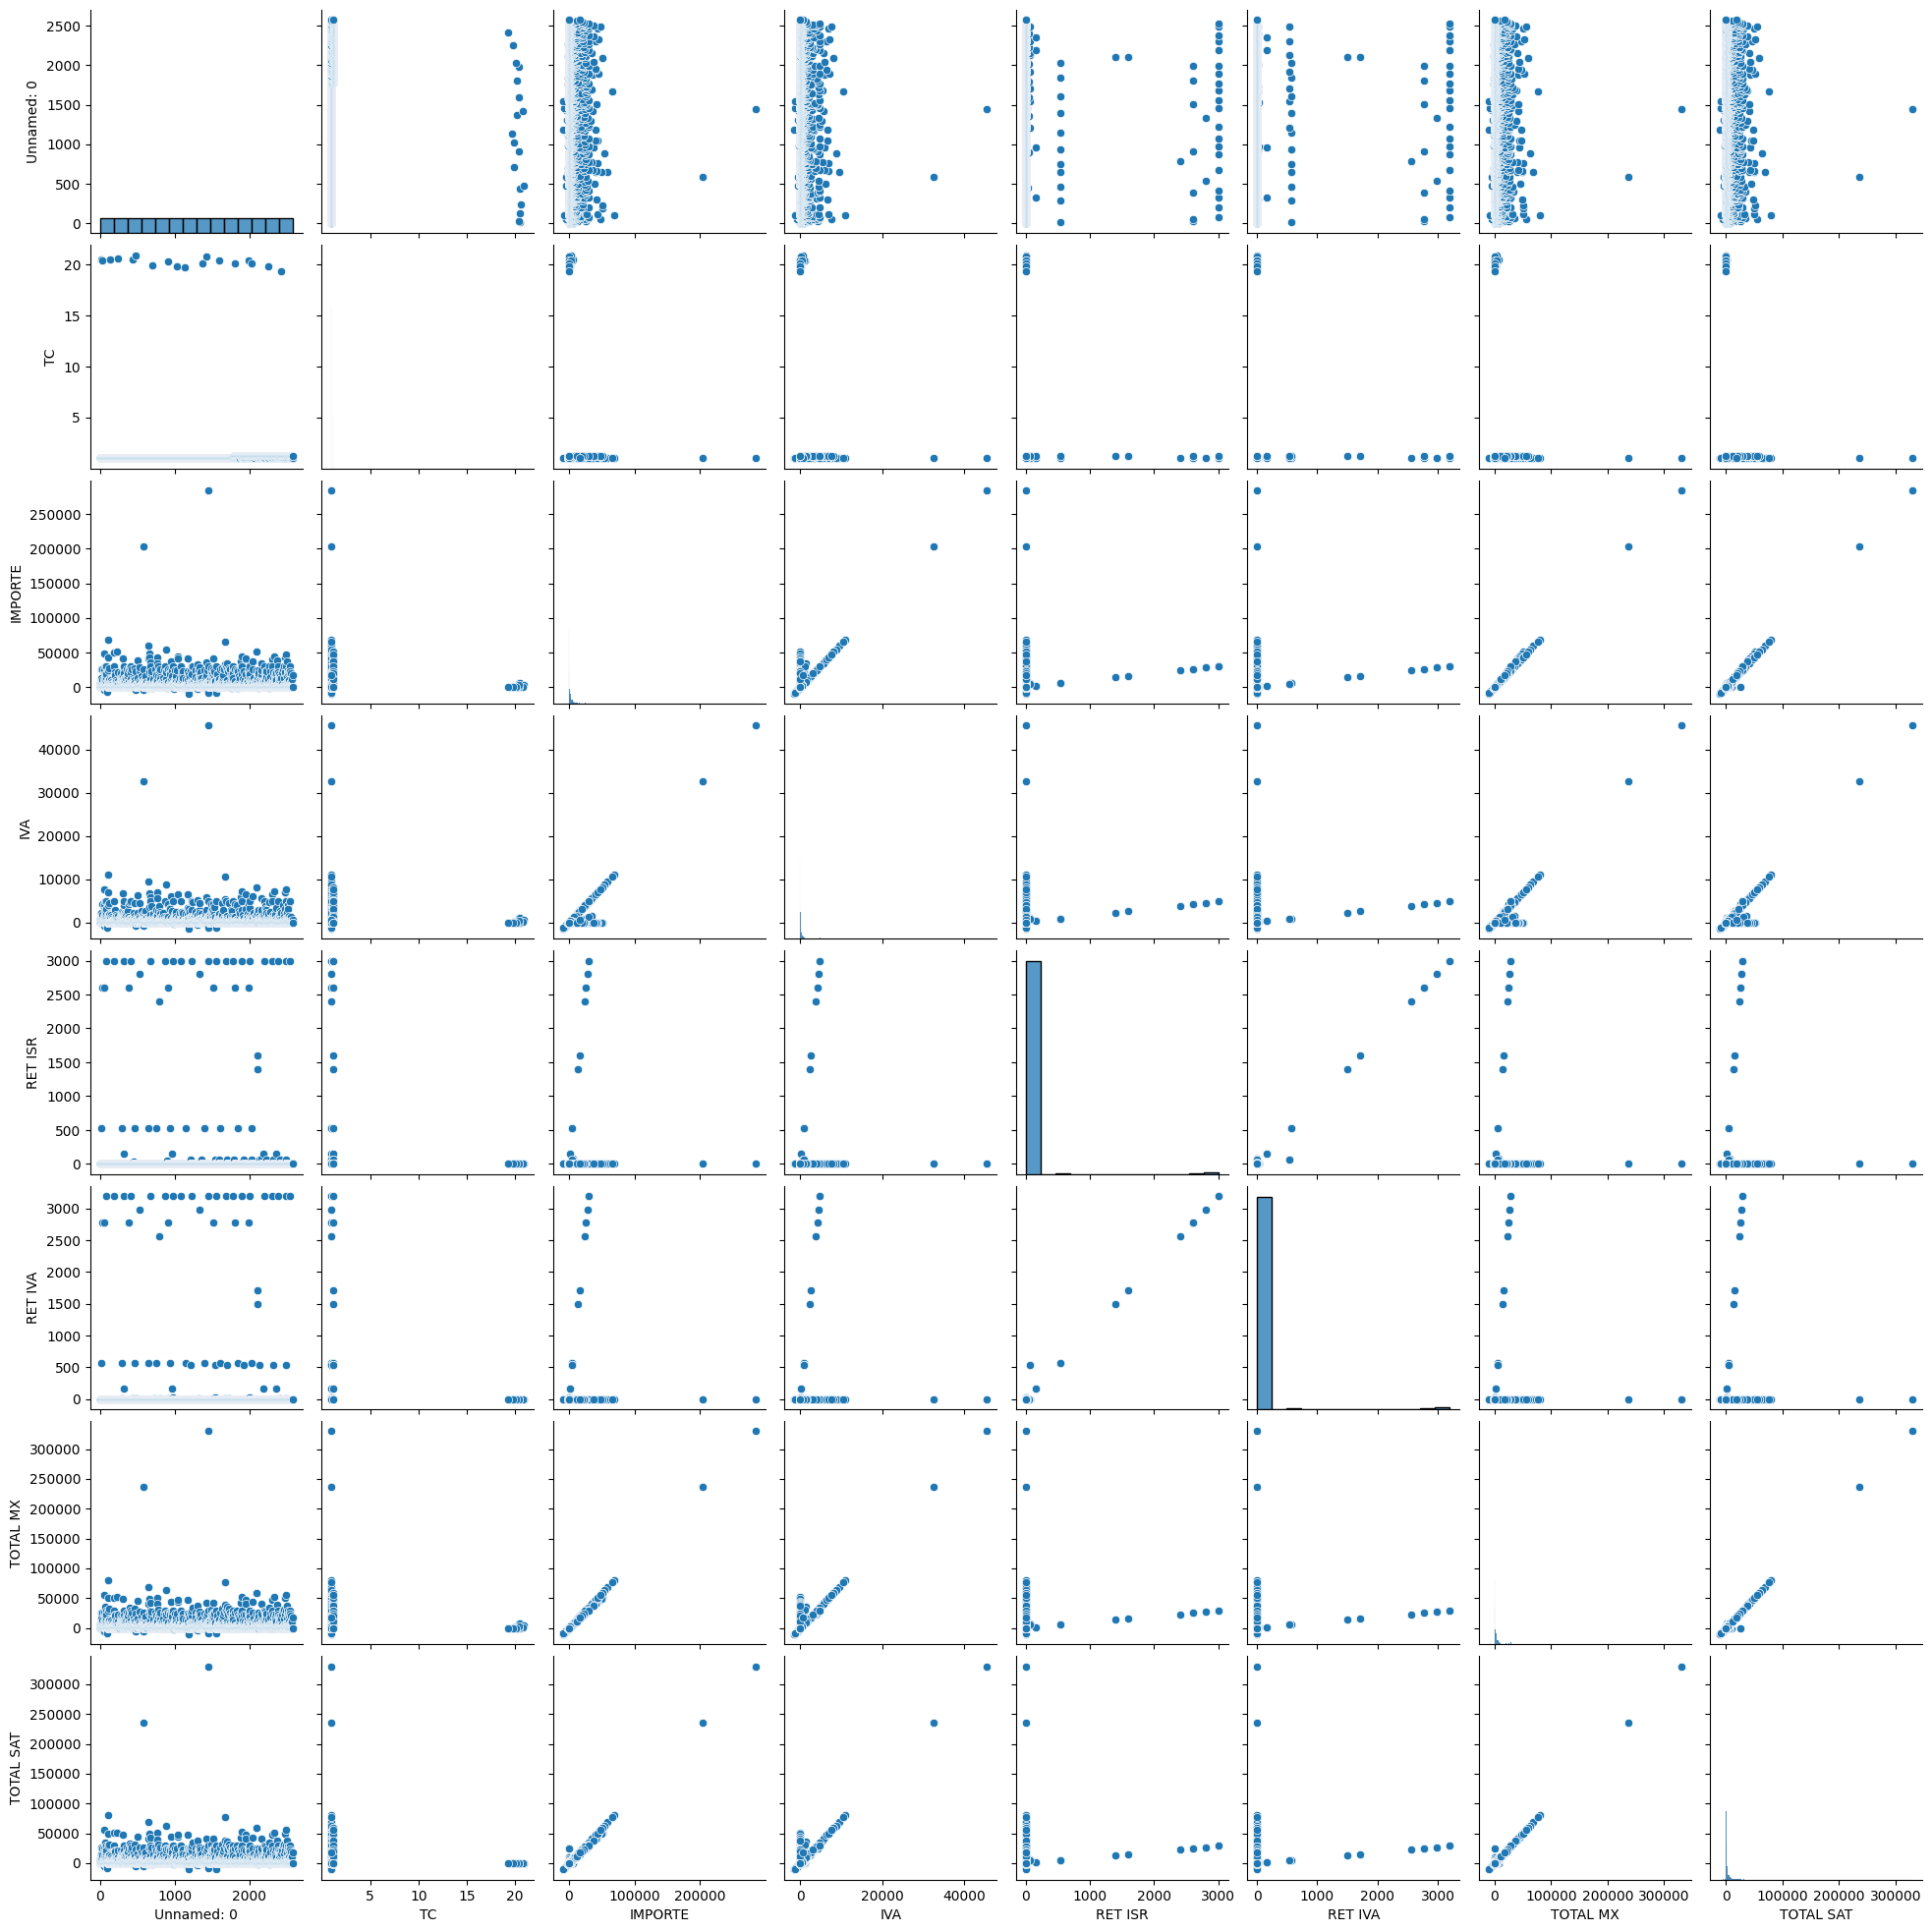

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

## **MODELO Cuadratico**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.56201988e-05, 6.58274851e+00, 1.14179671e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['IVA'], df['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,7001.048906
1,7001.709956
2,1141.796711
3,1141.796711
4,1141.796711
...,...
2572,1141.796711
2573,4544.765551
2574,1141.796711
2575,1141.796711


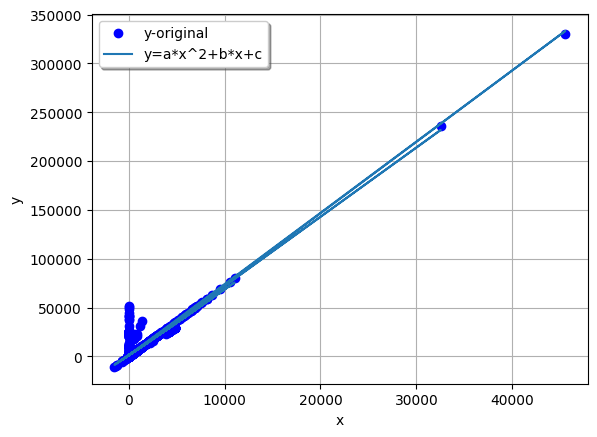

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.8397849221560657

# **Modelo Polinomial**

In [ ]:
def func2(x, a, b, c):
    return a*x**3 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([2.85013862e-10, 6.69685178e+00, 1.10956687e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['IVA'], df['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a*x**3 + b*x + c

In [ ]:
yfit2

,IVA
0,17934.543062
1,17938.898748
2,1141.796711
3,1141.796711
4,1141.796711
...,...
2572,1141.796711
2573,6690.625886
2574,1141.796711
2575,1141.796711


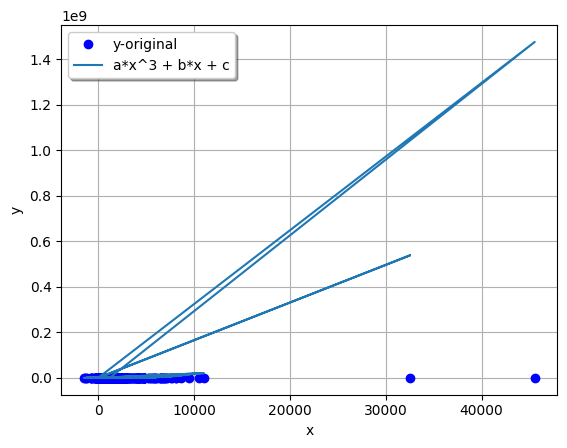

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*x^3 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

-7179723.76882414

## **Modelo Regresión lineal Simple**

<Axes: xlabel='IVA', ylabel='TOTAL MX'>

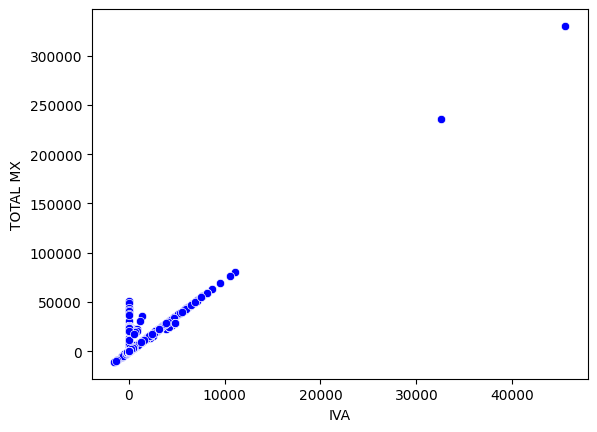

In [ ]:
from turtle import color

sns.scatterplot(x='IVA', y='TOTAL MX', color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.95864235]),
 'rank_': 1,
 'singular_': array([77133.57274913]),
 'intercept_': 997.6335244922157}

**Modelo matemático: y= 6.95864235x + 997.6335244922157**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.838312234112905

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable ""
y_pred= model.predict(X=df[['IVA']])
y_pred

array([7178.43883378, 7179.13469802,  997.63352449, ...,  997.63352449,
        997.63352449,  997.63352449])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,Unnamed: 0,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,...,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP.1,TIPO,STATUS,POLIZA
0,7178.438834,0,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,...,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22
1,7179.134698,1,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,...,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22
2,997.633524,2,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,...,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,NaN
3,997.633524,3,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,...,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN
4,997.633524,4,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,...,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,997.633524,2572,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,...,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,NaN
2573,4590.519743,2573,PUE,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62,...,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,NaN
2574,997.633524,2574,NaN,1.2,0.00,0.00,0.0,0.0,0.00,0.00,...,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,P,Vigente,NaN
2575,997.633524,2575,NaN,1.2,0.00,0.00,0.0,0.0,0.00,0.00,...,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN


<Axes: xlabel='IVA', ylabel='TOTAL MX'>

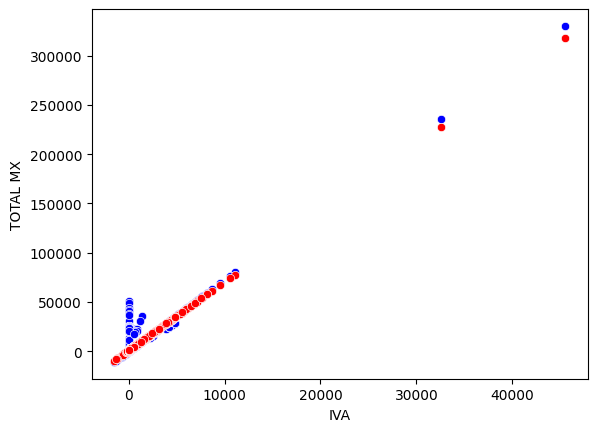

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='IVA', y='TOTAL MX', color="blue", data=df)
sns.scatterplot(x='IVA', y='Predicciones', color="red", data=df)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.838312234112905

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.915593924244206

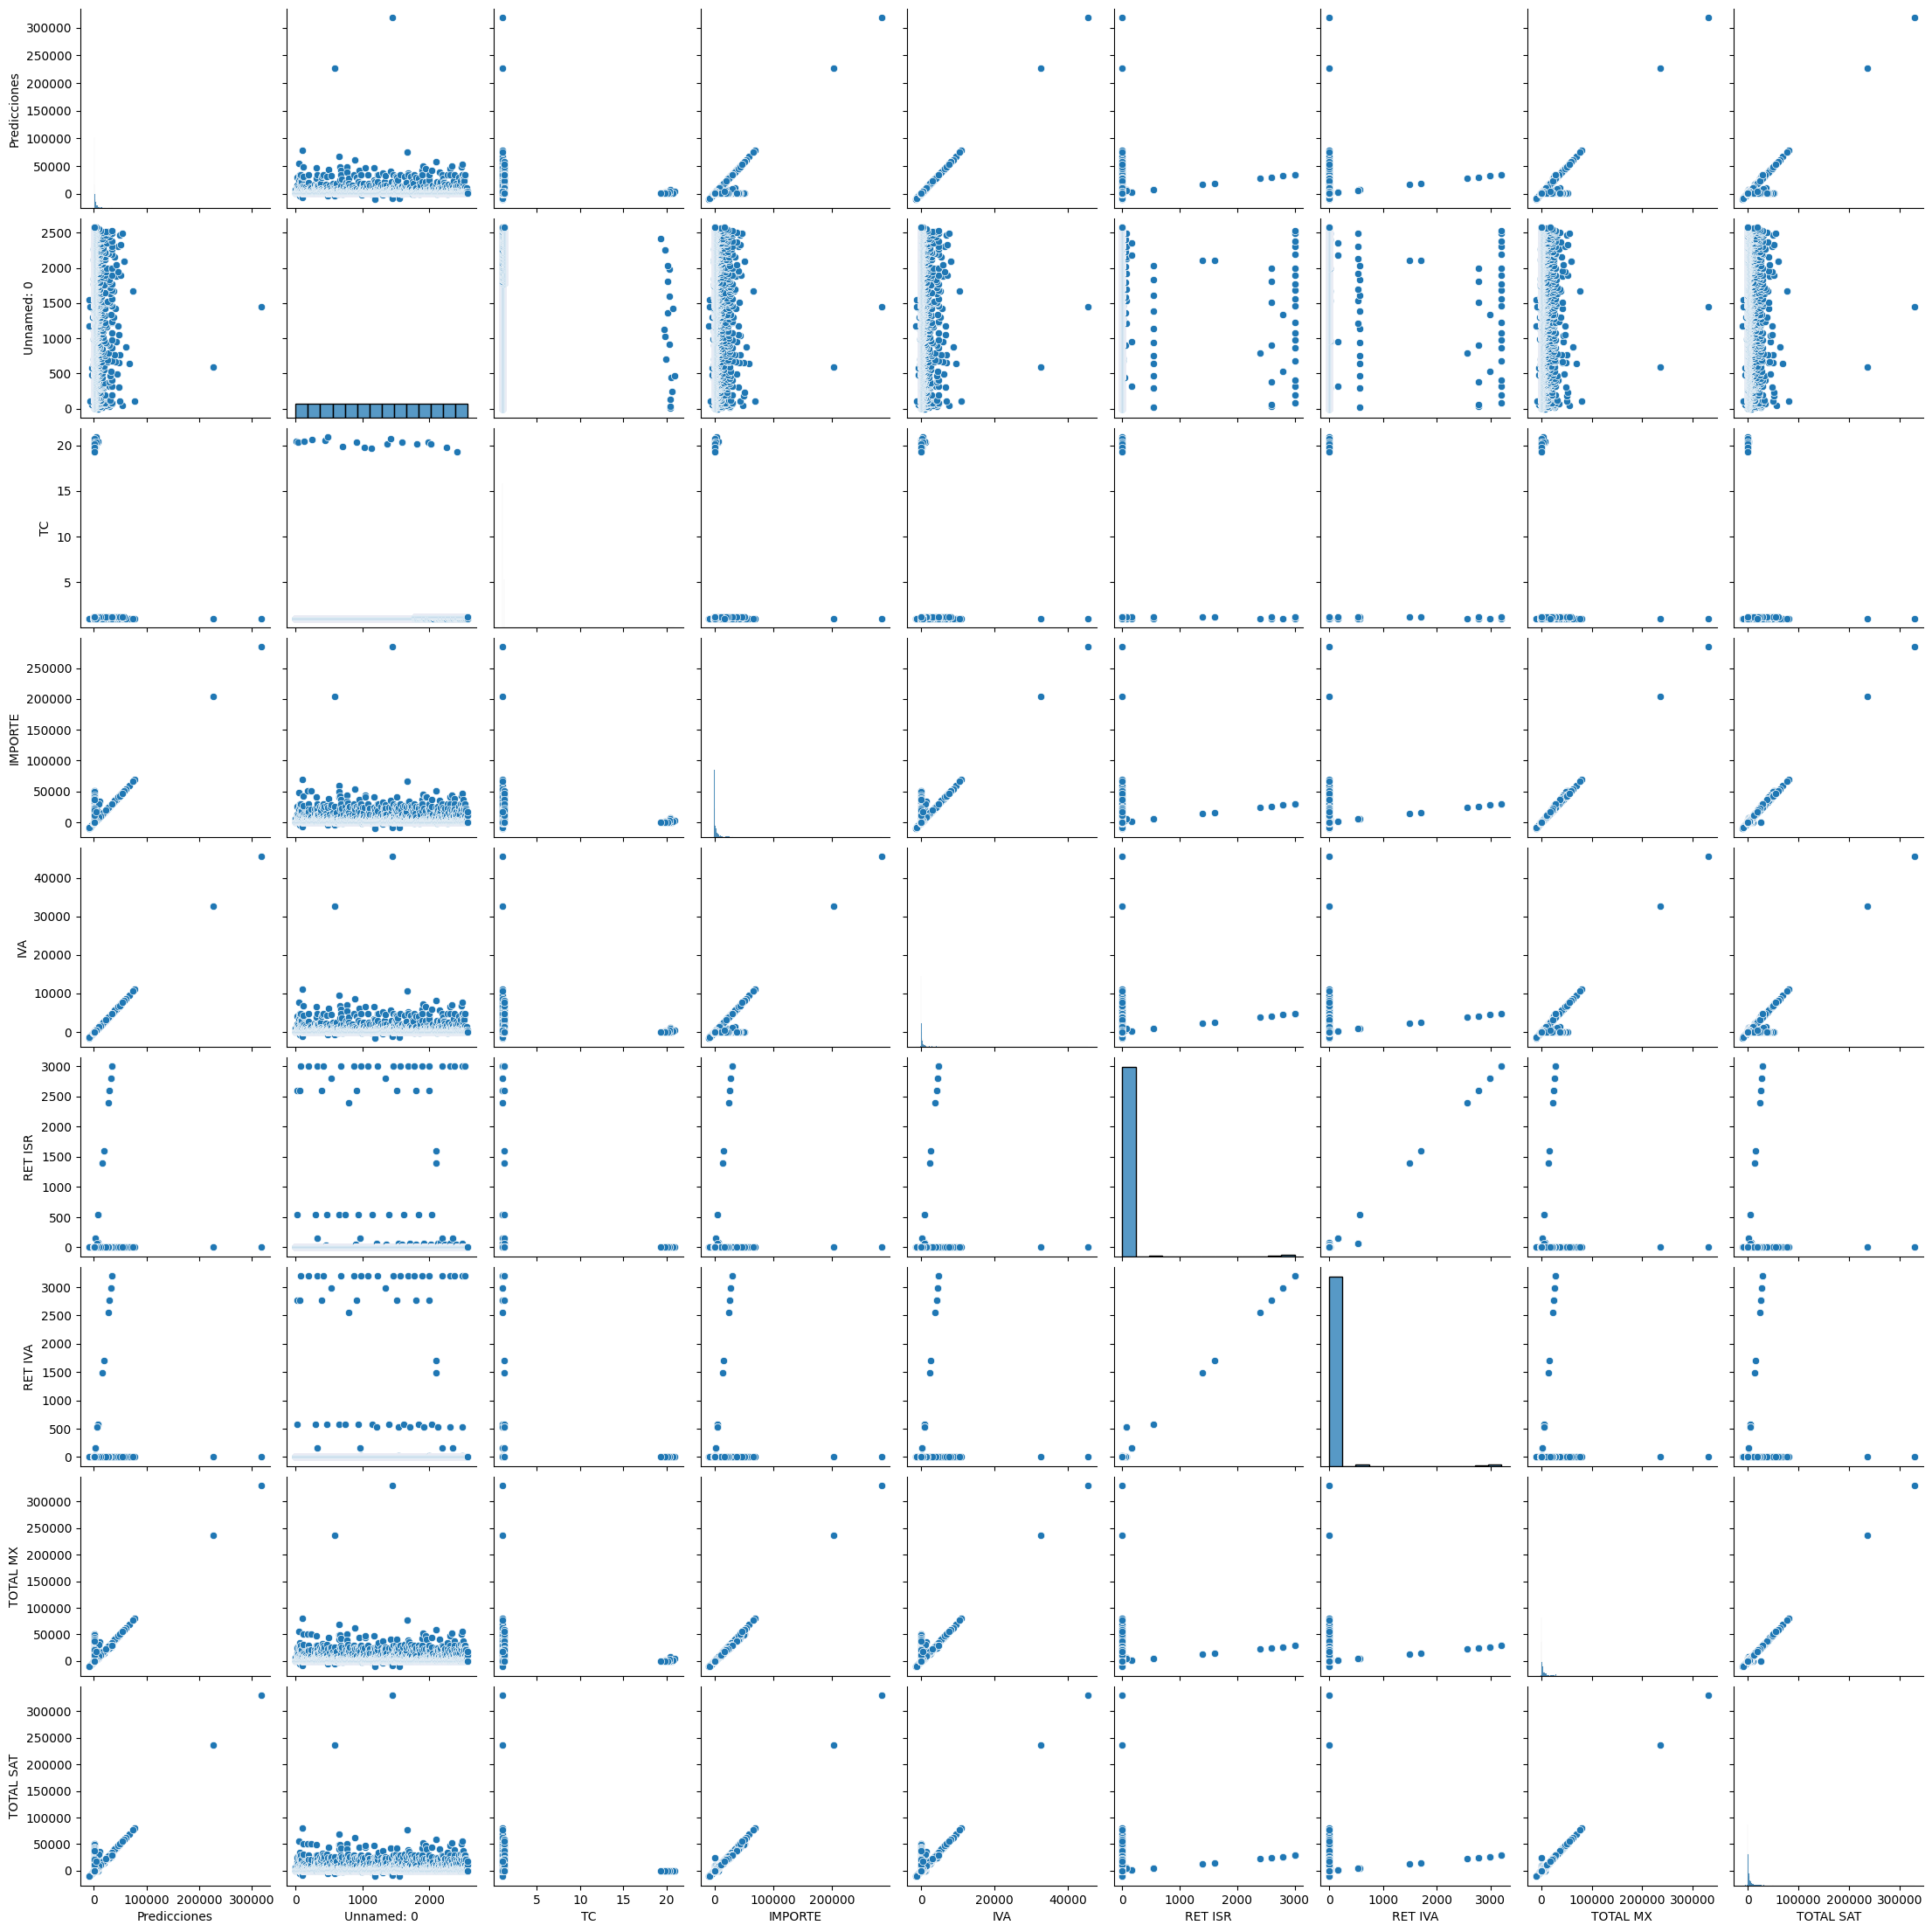

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

<ipython-input-36-bc474d8fc94a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df.corr()


,Predicciones,Unnamed: 0,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
Predicciones,1.000000,-0.009227,-0.015996,0.895450,1.000000,0.296579,0.296362,0.915594,0.914019
Unnamed: 0,-0.009227,1.000000,0.016036,-0.000316,-0.009227,-0.001378,0.001373,-0.001499,-0.001109
TC,-0.015996,0.016036,1.000000,-0.021719,-0.015996,-0.008927,-0.009056,-0.021020,-0.030726
IMPORTE,0.895450,-0.000316,-0.021719,1.000000,0.895450,0.261934,0.261470,0.997273,0.995445
IVA,1.000000,-0.009227,-0.015996,0.895450,1.000000,0.296579,0.296362,0.915594,0.914019
RET ISR,0.296579,-0.001378,-0.008927,0.261934,0.296579,1.000000,0.997307,0.217154,0.216656
RET IVA,0.296362,0.001373,-0.009056,0.261470,0.296362,0.997307,1.000000,0.216706,0.216193
TOTAL MX,0.915594,-0.001499,-0.021020,0.997273,0.915594,0.217154,0.216706,1.000000,0.998186
TOTAL SAT,0.914019,-0.001109,-0.030726,0.995445,0.914019,0.216656,0.216193,0.998186,1.000000


In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones,Unnamed: 0,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
Predicciones,1.000000,0.009227,0.015996,0.895450,1.000000,0.296579,0.296362,0.915594,0.914019
Unnamed: 0,0.009227,1.000000,0.016036,0.000316,0.009227,0.001378,0.001373,0.001499,0.001109
TC,0.015996,0.016036,1.000000,0.021719,0.015996,0.008927,0.009056,0.021020,0.030726
IMPORTE,0.895450,0.000316,0.021719,1.000000,0.895450,0.261934,0.261470,0.997273,0.995445
IVA,1.000000,0.009227,0.015996,0.895450,1.000000,0.296579,0.296362,0.915594,0.914019
RET ISR,0.296579,0.001378,0.008927,0.261934,0.296579,1.000000,0.997307,0.217154,0.216656
RET IVA,0.296362,0.001373,0.009056,0.261470,0.296362,0.997307,1.000000,0.216706,0.216193
TOTAL MX,0.915594,0.001499,0.021020,0.997273,0.915594,0.217154,0.216706,1.000000,0.998186
TOTAL SAT,0.914019,0.001109,0.030726,0.995445,0.914019,0.216656,0.216193,0.998186,1.000000


<Axes: >

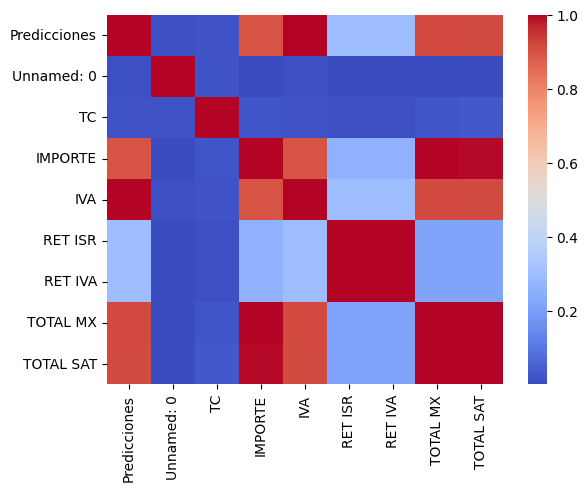

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

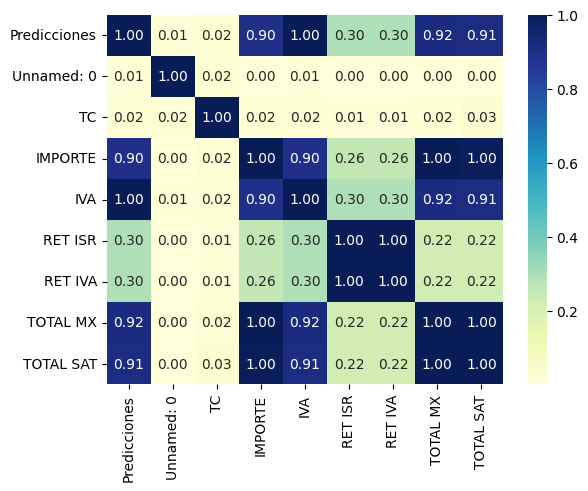

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map